# Practice Project - 1
World Happiness Report
Problem Statement:
Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

#What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

#What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

#What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

#The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset. 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv
https://github.com/dsrscientist/DSData

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [39]:
df = pd.read_csv(r'C:\Users\Administrator\Desktop\happiness_score.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [40]:
df.columns = df.columns.str.replace(' ','_')
print("The names of columns are: ", "\n", df.columns)

The names of columns are:  
 Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'Economy_(GDP_per_Capita)', 'Family',
       'Health_(Life_Expectancy)', 'Freedom', 'Trust_(Government_Corruption)',
       'Generosity', 'Dystopia_Residual'],
      dtype='object')


In [41]:
#rem_col_df --> remove column dataframe: 
#These below mentioned coluns are removed
#('Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)', 'Freedom', 'Trust_(Government_Corruption)','Generosity')
rem_col_df = df.drop(['Happiness_Rank','Happiness_Score','Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
                     'Freedom', 'Trust_(Government_Corruption)','Generosity'], axis=1)
rem_col_df

,Country,Region,Standard_Error,Dystopia_Residual
0,Switzerland,Western Europe,0.03411,2.51738
1,Iceland,Western Europe,0.04884,2.70201
2,Denmark,Western Europe,0.03328,2.49204
3,Norway,Western Europe,0.03880,2.46531
4,Canada,North America,0.03553,2.45176
...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,0.03464,0.67042
154,Benin,Sub-Saharan Africa,0.03656,1.63328
155,Syria,Middle East and Northern Africa,0.05015,0.32858
156,Burundi,Sub-Saharan Africa,0.08658,1.83302


In [42]:
len(rem_col_df['Region'].unique())

10

# Creating Distribution plots

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

======================================== DISTRIBUTION PLOTS ========================================


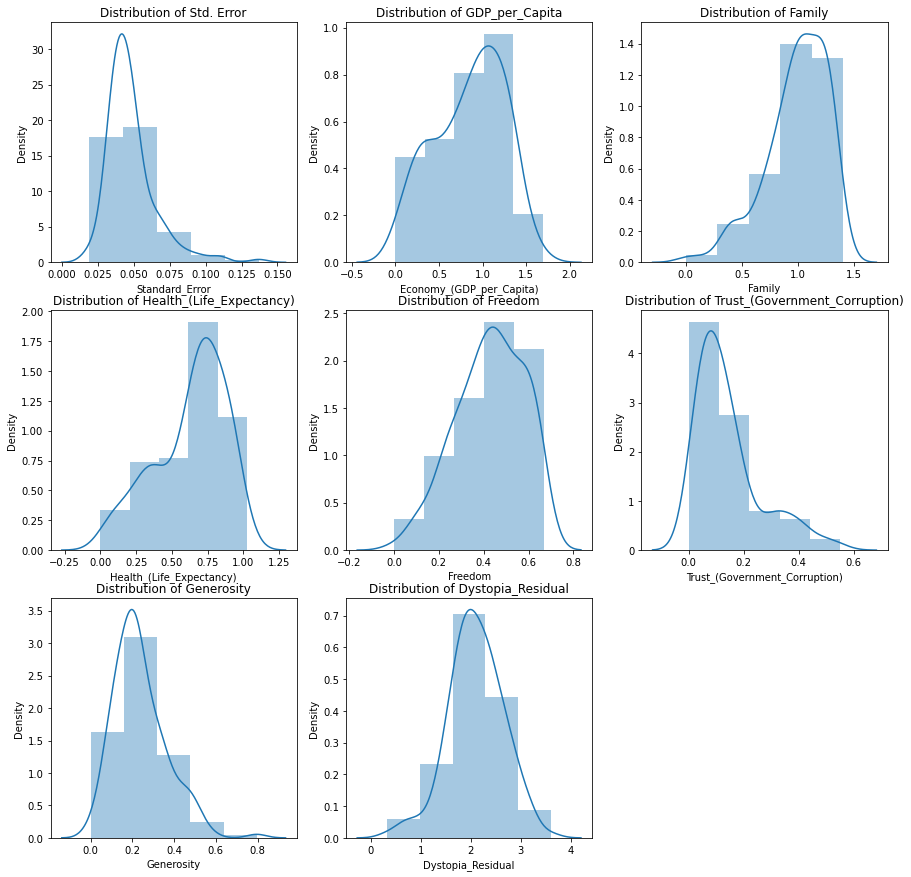

======================================== END OF DISTRIBUTION PLOTS ========================================


In [45]:
print("="*40, 'DISTRIBUTION PLOTS', "="*40)

plt.figure(1,figsize=(15,15))

plt.subplot(331)
sns.distplot(df['Standard_Error'], bins=5).set_title("Distribution of Std. Error")

plt.subplot(332)
sns.distplot(df['Economy_(GDP_per_Capita)'], bins=5).set_title("Distribution of GDP_per_Capita")

plt.subplot(333)
sns.distplot(df['Family'], bins=5).set_title("Distribution of Family")

plt.subplot(334)
sns.distplot(df['Health_(Life_Expectancy)'], bins=5).set_title("Distribution of Health_(Life_Expectancy)")

plt.subplot(335)
sns.distplot(df['Freedom'], bins=5).set_title("Distribution of Freedom")

plt.subplot(336)
sns.distplot(df['Trust_(Government_Corruption)'], bins=5).set_title("Distribution of Trust_(Government_Corruption)")

plt.subplot(337)
sns.distplot(df['Generosity'], bins=5).set_title("Distribution of Generosity")

plt.subplot(338)
sns.distplot(df['Dystopia_Residual'], bins=5).set_title("Distribution of Dystopia_Residual")

plt.show()
print("="*40, 'END OF DISTRIBUTION PLOTS', "="*40)

Skewness is visible in the distribution plots

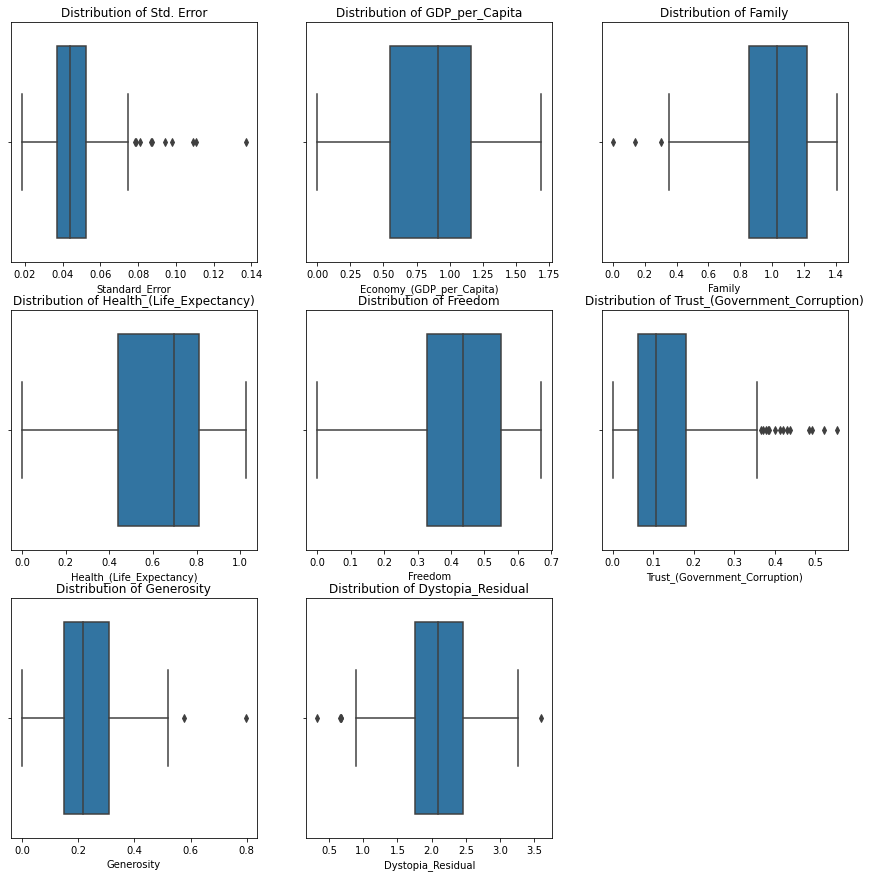

======================================== END OF BOX PLOTS ========================================


In [46]:
plt.figure(2,figsize=(15,15))

plt.subplot(331)
sns.boxplot(df['Standard_Error']).set_title("Distribution of Std. Error")

plt.subplot(332)
sns.boxplot(df['Economy_(GDP_per_Capita)']).set_title("Distribution of GDP_per_Capita")

plt.subplot(333)
sns.boxplot(df['Family']).set_title("Distribution of Family")

plt.subplot(334)
sns.boxplot(df['Health_(Life_Expectancy)']).set_title("Distribution of Health_(Life_Expectancy)")

plt.subplot(335)
sns.boxplot(df['Freedom']).set_title("Distribution of Freedom")

plt.subplot(336)
sns.boxplot(df['Trust_(Government_Corruption)']).set_title("Distribution of Trust_(Government_Corruption)")

plt.subplot(337)
sns.boxplot(df['Generosity']).set_title("Distribution of Generosity")

plt.subplot(338)
sns.boxplot(df['Dystopia_Residual']).set_title("Distribution of Dystopia_Residual")

plt.show()
print("="*40, 'END OF BOX PLOTS', "="*40)

Outliers are visible in Trust_(Government_Corruption) column

======================================== PAIRPLOT ========================================


<Figure size 1080x1080 with 0 Axes>

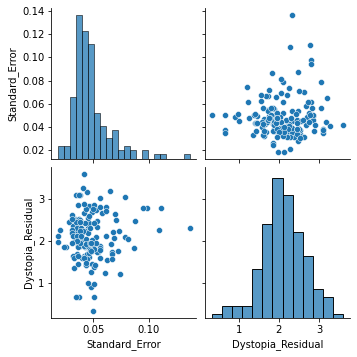

======================================== END OF PAIR PLOTS ========================================


In [86]:
plt.figure(3,figsize=(15,15))
print("="*40, "PAIRPLOT","="*40)
sns.pairplot(rem_col_df)
plt.show()
print("="*40, 'END OF PAIR PLOTS', "="*40)

In [87]:
X = pd.get_dummies(rem_col_df)
X

,Standard_Error,Dystopia_Residual,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,0.03411,2.51738,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.04884,2.70201,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.03328,2.49204,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.03880,2.46531,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.03553,2.45176,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.03464,0.67042,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
154,0.03656,1.63328,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
155,0.05015,0.32858,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
156,0.08658,1.83302,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [88]:
y = df['Happiness_Score']
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness_Score, Length: 158, dtype: float64

In [89]:
lr = LinearRegression()

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=50)

In [91]:
lr.fit(X_train,y_train )

LinearRegression()

In [92]:
print("Train score: ", lr.score(X_train,y_train))
print("Test score: ", lr.score(X_test,y_test))

Train score:  1.0
Test score:  0.7692950646903419


In [93]:
print("Value of coefficients: ","\n", lr.coef_)

Value of coefficients:  
 [-3.75051018e-02  9.14340442e-01  4.30297598e-03 -2.24265114e-01
 -3.11743655e-01 -1.42186238e-01  2.30429107e-01 -1.57454742e-04
  4.73598952e-01  5.16140212e-06 -6.49546614e-02  6.78035724e-01
 -6.79733829e-01  4.17241298e-01  1.14587726e-01 -5.46567387e-01
  6.83694396e-01 -4.41609041e-01 -3.84171818e-01  2.22044605e-15
  2.51538589e-01 -5.18809663e-02 -1.45396783e-01 -1.16232174e+00
 -7.19762769e-01  7.55768284e-02  6.99118029e-01 -1.20338129e+00
 -5.02655076e-01  4.73306289e-01 -6.06801417e-01  1.14054299e-01
 -2.27153803e-01 -2.77555756e-16 -1.11022302e-16  5.70323743e-01
 -2.06441216e-01 -6.52154465e-01  6.09256485e-01  6.33900505e-01
  1.01930965e-01  2.64208218e-02 -9.74273091e-02 -9.61952367e-01
 -3.95147340e-01  5.29829434e-01 -1.20147225e-01  3.96242446e-01
 -6.13019763e-02  5.89760356e-01 -6.09032400e-01 -3.33066907e-16
  2.22044605e-16 -1.40361248e+00 -1.34896248e-01 -5.58328329e-01
 -1.28118603e+00 -6.48229769e-01  8.30978993e-01 -5.55111512e-16

In [94]:
print("Intercept: ", lr.intercept_)

Intercept:  3.788353176316229


In [95]:
predicted_happiness = lr.predict(X_test)
predicted_happiness_df = pd.DataFrame(predicted_happiness)

In [96]:
#predicted_happiness_df

In [97]:
print(y_test, predicted_happiness_df)

20     6.867
63     5.716
107    4.715
127    4.332
12     7.200
74     5.360
138    3.989
81     5.192
25     6.750
145    3.781
23     6.798
96     4.898
152    3.575
34     6.411
16     6.946
126    4.350
155    3.006
75     5.332
54     5.848
120    4.514
39     6.269
119    4.517
73     5.399
88     5.098
14     7.119
128    4.307
113    4.633
59     5.791
140    3.931
143    3.845
146    3.681
103    4.800
Name: Happiness_Score, dtype: float64            0
0   6.416271
1   5.526847
2   5.562015
3   3.729306
4   6.930580
5   5.654793
6   3.929385
7   5.412125
8   6.549543
9   3.655179
10  5.364950
11  4.949642
12  4.860911
13  5.922981
14  6.415356
15  5.055002
16  3.993451
17  5.600104
18  4.924692
19  4.860316
20  6.300421
21  5.014708
22  5.346175
23  4.930325
24  6.781126
25  4.937776
26  4.504172
27  5.153108
28  3.698313
29  4.111049
30  4.085646
31  4.581036


# ---------------------------END-----------------------------